<a href="https://colab.research.google.com/github/kunikagupta27/Rainfall_Prediction_model/blob/main/Regression_Approach_%7C_Rainfall_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Rainfall Prediction Model </u></b>

***The Data is collected from the website https://open-meteo.com/.***

***Here I have collected the historical weather API data from date 1st Jan 2019 to 10th Feb 2023.***

***The attributes which I have selected are described below and with the help of these attributes I have created a rainfall prediction model by which we can predict the rainfall on daily basis.***

# **Attributes and their Description**

**Attribute Information:**

* **Time:-** Date given in format year-month-day

* **temperature_2m_max:-** Maximum daily air temperature at 2 meters above ground

* **temperature_2m_min:-** Minimum daily air temperature at 2 meters above ground

* **temperature_2m_mean (°C):-** Mean daily air temperature at 2 meters above ground

* **precipitation_sum (mm):-** Sum of daily precipitation (including rain, showers and snowfall)

* **rain_sum (mm):-** Sum of daily rain (Target Variable)

* **precipitation_hours (hours):-** The number of hours with rain

* **windspeed_10m_max (km/h (mph, m/s, knots):-** Maximum wind speed on a day

* **winddirection_10m_dominant (°):-** Dominant wind direction




# **Loading the dataset**

In [1]:
# Importing necessary libraries

import numpy as np
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting the Google Drive to access data.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset

file_path = '/content/drive/MyDrive/Log9 Materials Assignment/Historical Weather API Data.csv'

df = pd.read_csv(file_path)

# **Dataset Inspection**

In this section I have done some basic operations to see what sort of data that we have and what all attributes are there along with the dependent variable.

In [4]:
# Checking the first 5 rows of the dataset

df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°)
0,1/1/2019,26.2,10.0,18.2,0.0,0.0,0,10.1,131
1,1/2/2019,27.0,13.5,20.1,0.0,0.0,0,10.2,325
2,1/3/2019,26.0,12.2,18.7,0.0,0.0,0,10.5,40
3,1/4/2019,26.3,11.5,18.7,0.0,0.0,0,10.2,109
4,1/5/2019,27.5,13.0,19.6,0.0,0.0,0,12.5,189


In [5]:
# Checking the last 5 rows of the dataset

df.tail()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°)
1497,2/6/2023,28.9,16.2,21.8,0.0,0.0,0,10.2,222
1498,2/7/2023,28.3,14.3,21.1,0.0,0.0,0,11.6,346
1499,2/8/2023,28.7,13.4,21.0,0.0,0.0,0,9.7,57
1500,2/9/2023,30.0,14.9,22.6,0.0,0.0,0,9.6,189
1501,2/10/2023,32.0,14.6,22.9,0.0,0.0,0,16.8,262


In [6]:
# List of columns of the dataset 

df.columns

Index(['time', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'precipitation_sum (mm)', 'rain_sum (mm)',
       'precipitation_hours (h)', 'windspeed_10m_max (km/h)',
       'winddirection_10m_dominant (°)'],
      dtype='object')

In [7]:
# Checking number of rows and columns in our dataset.

df.shape

(1502, 9)

**Let's check the duplicate entries**

In [8]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()])) 

Duplicate entry in data: 0


In [9]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

In [10]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",df.shape,"\n")

# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (1502, 9) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
time,object,1502,1502,0,0.0
temperature_2m_max (°C),float64,1502,224,0,0.0
temperature_2m_min (°C),float64,1502,218,0,0.0
temperature_2m_mean (°C),float64,1502,220,0,0.0
precipitation_sum (mm),float64,1502,190,0,0.0
rain_sum (mm),float64,1502,190,0,0.0
precipitation_hours (h),int64,1502,25,0,0.0
windspeed_10m_max (km/h),float64,1502,221,0,0.0
winddirection_10m_dominant (°),int64,1502,347,0,0.0


*  **Our dataset has no null and duplicate values**
*  **Our dataset has a total of 1502 rows and 9 independent features**
*  **Our response variable is the 'rain_sum (mm)' column**

# **Preprocessing the Data**

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.

**Renaming the time column as date bacause the information in the column is dates.**

In [11]:
# Renaming the column from time to date

df.rename(columns={"time":"Date"},inplace = True)

In [12]:
# Converting the Date column in Datetime Dtype as it is in object Dtype
df['Date'] = pd.to_datetime(df['Date'])

# Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            1502 non-null   datetime64[ns]
 1   temperature_2m_max (°C)         1502 non-null   float64       
 2   temperature_2m_min (°C)         1502 non-null   float64       
 3   temperature_2m_mean (°C)        1502 non-null   float64       
 4   precipitation_sum (mm)          1502 non-null   float64       
 5   rain_sum (mm)                   1502 non-null   float64       
 6   precipitation_hours (h)         1502 non-null   int64         
 7   windspeed_10m_max (km/h)        1502 non-null   float64       
 8   winddirection_10m_dominant (°)  1502 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 105.7 KB


In [13]:
# Seperating Day, Month, Year from DataFrame Column.

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [14]:
# dropping the Date column after extracting necessory information.

df.drop(columns=['Date'],inplace=True)

In [15]:
# Checking the head of our dataset
df.head()

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),Day,Month,Year
0,26.2,10.0,18.2,0.0,0.0,0,10.1,131,1,1,2019
1,27.0,13.5,20.1,0.0,0.0,0,10.2,325,2,1,2019
2,26.0,12.2,18.7,0.0,0.0,0,10.5,40,3,1,2019
3,26.3,11.5,18.7,0.0,0.0,0,10.2,109,4,1,2019
4,27.5,13.0,19.6,0.0,0.0,0,12.5,189,5,1,2019


In [16]:
# list of numerical variables
numerical_features=[col for col in df.columns if df[col].dtype!='O']\

# Separate dataframe for Numerical feature
num_data = df[numerical_features]
num_data.head()

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),Day,Month,Year
0,26.2,10.0,18.2,0.0,0.0,0,10.1,131,1,1,2019
1,27.0,13.5,20.1,0.0,0.0,0,10.2,325,2,1,2019
2,26.0,12.2,18.7,0.0,0.0,0,10.5,40,3,1,2019
3,26.3,11.5,18.7,0.0,0.0,0,10.2,109,4,1,2019
4,27.5,13.0,19.6,0.0,0.0,0,12.5,189,5,1,2019


In [17]:
# Statistical info.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m_max (°C),1502.0,30.249068,5.201051,17.5,26.7,29.1,33.2,43.3
temperature_2m_min (°C),1502.0,20.100999,5.089638,7.0,15.9,21.8,23.9,30.5
temperature_2m_mean (°C),1502.0,24.940679,4.838645,13.4,21.7,24.6,27.9,35.7
precipitation_sum (mm),1502.0,3.054394,11.621508,0.0,0.0,0.0,1.2,266.7
rain_sum (mm),1502.0,3.054394,11.621508,0.0,0.0,0.0,1.2,266.7
precipitation_hours (h),1502.0,3.581225,6.245990,0.0,0.0,0.0,5.0,24.0
windspeed_10m_max (km/h),1502.0,14.855992,4.859161,5.2,11.2,14.2,17.9,34.2
winddirection_10m_dominant (°),1502.0,184.996671,104.482185,0.0,82.0,190.0,280.0,360.0
Day,1502.0,15.667111,8.819289,1.0,8.0,16.0,23.0,31.0
Month,1502.0,6.378828,3.510282,1.0,3.0,6.0,9.0,12.0


# **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is an approach to analyzing and summarizing data sets in order to extract insights and understand the data better. It involves using a variety of techniques and visualizations to get a sense of the structure, patterns, and relationships within the data.

In EDA, the focus is on discovering and understanding the characteristics of the data rather than testing specific hypotheses or making predictions. EDA can be useful in a wide range of applications, from scientific research to business analysis.

# **Univariate Analysis**

Univariate analysis is a type of data analysis that involves examining a single variable or feature in isolation, without considering any other variables. The objective of univariate analysis is to describe and summarize the distribution, central tendency, and variability of a single variable in a data set.

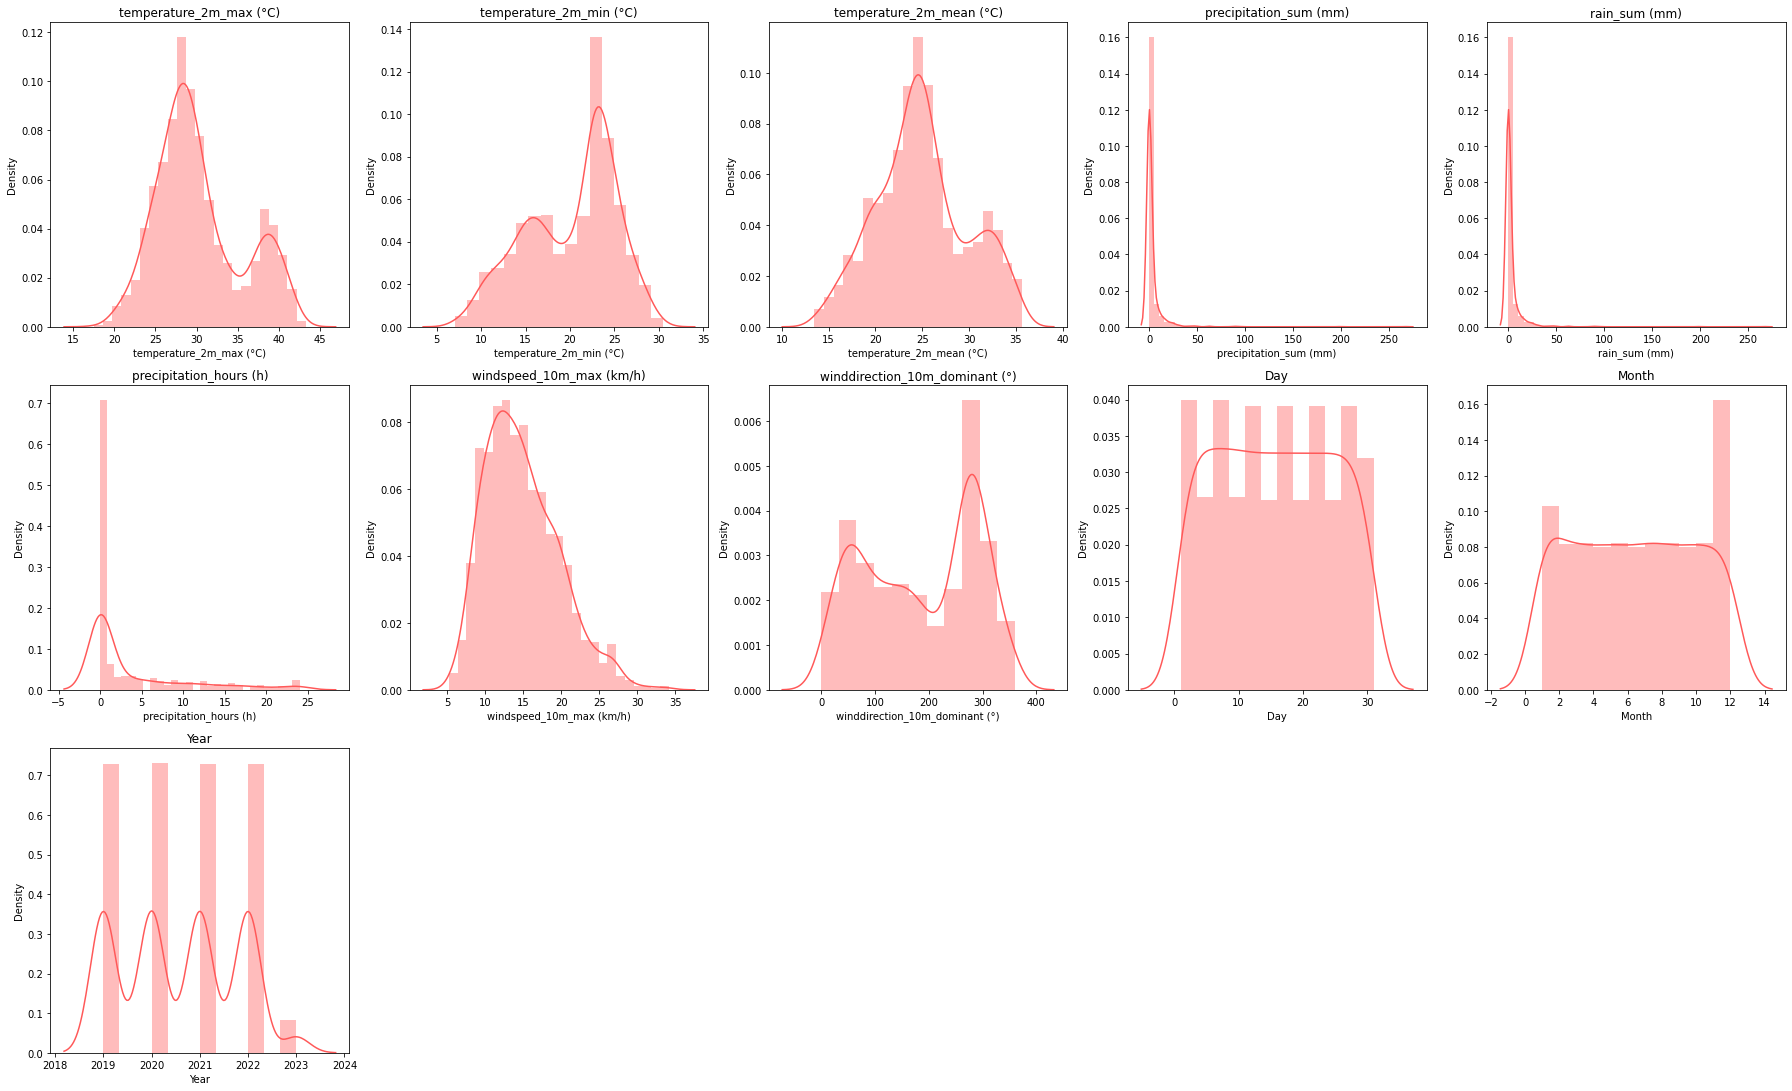

In [18]:
# Distibution plot of Numerical features to check the skewness.

n=1
plt.figure(figsize=(25, 35))
for i in num_data:
  plt.subplot(7,5,n)
  n= n+1
  sns.distplot(df[i],color='#FF5959')
  plt.title(i)
  plt.tight_layout()

# **Outlier Detection**

Outlier detection is a statistical analysis technique that involves identifying and treating observations in a data set that are significantly different from the majority of the other observations. An outlier is an observation that is significantly different from the other observations in the data set, and can be caused by measurement error, data entry errors, or genuine anomalies in the data.

Outliers can have a significant impact on statistical analyses, such as mean and variance, and can result in biased or incorrect results. Therefore, outlier detection is an important step in data analysis to ensure that accurate and reliable results are obtained.

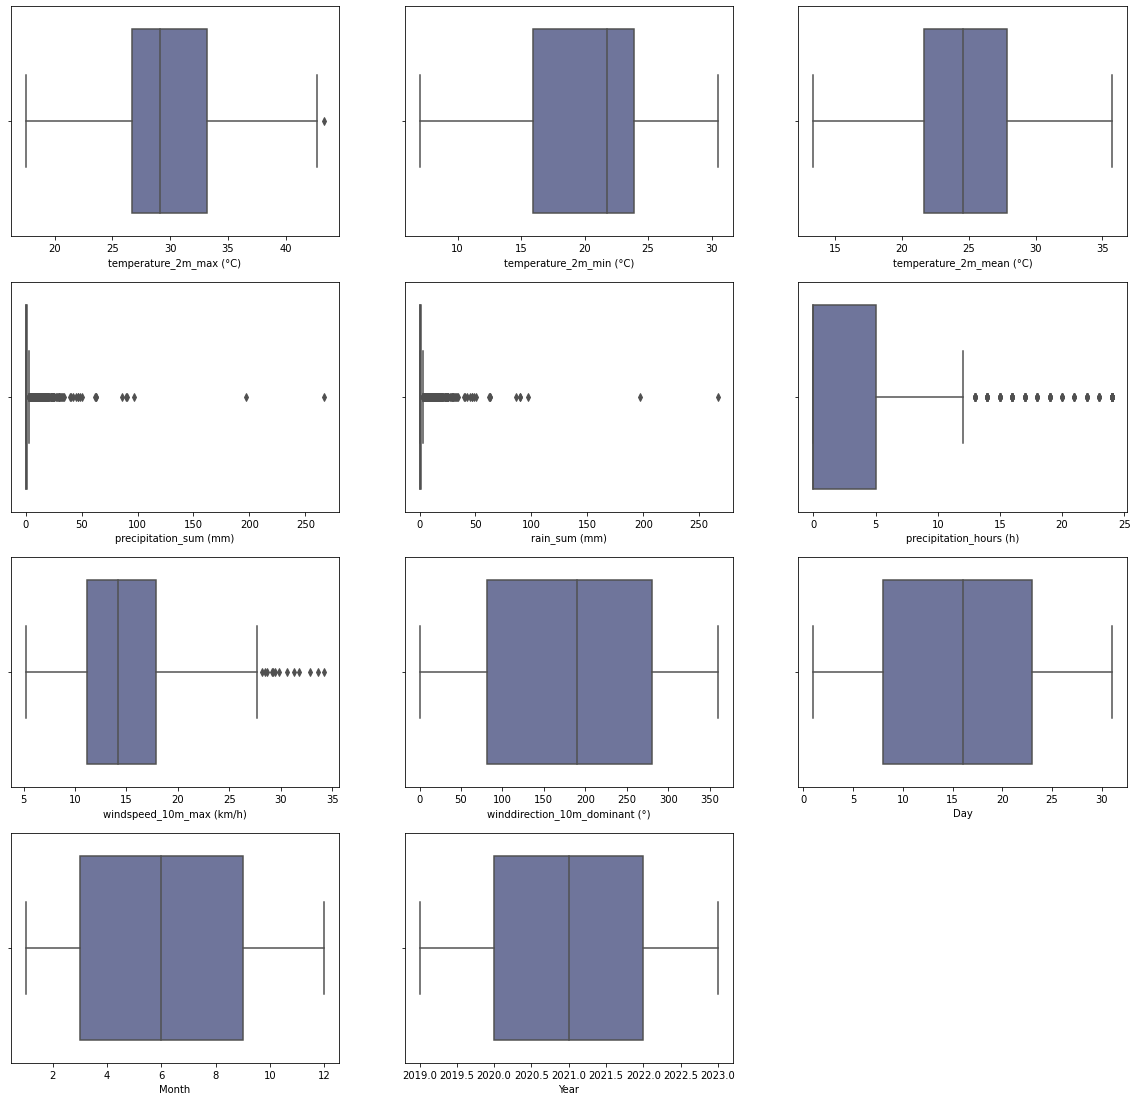

In [20]:
# ploting a boxplot for each numerical feature to check the outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature], color='#676FA3')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

**As we can check from the above box plot that we have some fields in our dataset which have outliers but as we know that the tree based models like decision tree, random forest and XGBoost are robust to outliers that is why I am not dealing with outliers as of now and will train the model with the outliers.**

# **Checking Multicollinearity**

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

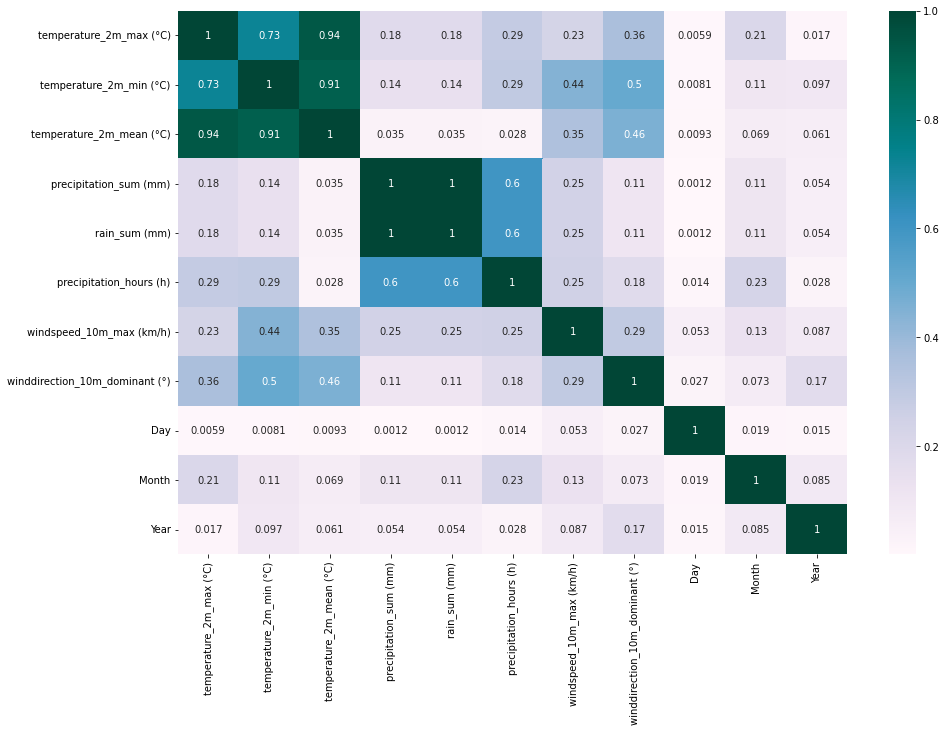

In [21]:
# Ploting correlation graph to check multicollinearity

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

**As we can see from the above heatmap that "precipitation_sum (mm)" and "rain_sum (mm)" are highly correlated because precipitation and rainfall are essentially the same thing. Precipitation is a more general term that refers to any form of moisture that falls from the sky, including rain, snow, sleet, and hail. Rainfall, on the other hand, specifically refers to the amount of water that falls from the sky in the form of rain.**

**So, in essence, rainfall is a type of precipitation, and they are not distinct or separate phenomena. In fact, when meteorologists or climatologists refer to precipitation, they are often specifically referring to rainfall as it is the most common form of precipitation.**

**As a result I have removed the "precipitation_sum (mm)" to remove collinearity.**

# **VIF Calculation**

VIF stands for Variance Inflation Factor, which is a measure of the degree of multicollinearity between independent variables in a regression analysis. Multicollinearity refers to the situation where two or more independent variables in a regression analysis are highly correlated with each other.

VIF measures how much the variance of the estimated regression coefficient of an independent variable is increased due to multicollinearity with the other independent variables. A high VIF indicates that the variable is highly correlated with the other independent variables and may be redundant or unnecessary in the regression analysis.

In general, a VIF value greater than 5 or 10 is considered to indicate a high degree of multicollinearity, although this may vary depending on the specific context and research question.

In [22]:
# Importing necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Making function for VIF calculation.

def cal_VIF(F):
 
  
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [23]:
# Checking the VIF score of all the independent variables.

cal_VIF(df[[i for i in df.describe().columns]])

,variables,VIF
0,temperature_2m_max (°C),2774.863472
1,temperature_2m_min (°C),1027.319268
2,temperature_2m_mean (°C),6100.230486
3,precipitation_sum (mm),inf
4,rain_sum (mm),inf
5,precipitation_hours (h),4.595723
6,windspeed_10m_max (km/h),14.911067
7,winddirection_10m_dominant (°),5.696088
8,Day,4.188686
9,Month,6.008822


In [24]:
# Checking VIF score of independent variables without precipitation_sum (mm)

cal_VIF(df[[i for i in df.describe().columns if i not in ['precipitation_sum (mm)']]])

,variables,VIF
0,temperature_2m_max (°C),2774.863472
1,temperature_2m_min (°C),1027.319268
2,temperature_2m_mean (°C),6100.230486
3,rain_sum (mm),1.750654
4,precipitation_hours (h),4.595723
5,windspeed_10m_max (km/h),14.911067
6,winddirection_10m_dominant (°),5.696088
7,Day,4.188686
8,Month,6.008822
9,Year,88.093906


**Ad we can check from the above VIF score calculations that still the "temperature_2m_max (°C)", "temperature_2m_min (°C)" and "temperature_2m_mean (°C)" are highly correlated so I checked the VIF score without the "temperature_2m_max (°C)", "temperature_2m_min (°C)".**

In [25]:
# Checking VIF score of independent variables without precipitation_sum (mm)

cal_VIF(df[[i for i in df.describe().columns if i not in ['precipitation_sum (mm)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)']]])

,variables,VIF
0,temperature_2m_mean (°C),38.977304
1,rain_sum (mm),1.707521
2,precipitation_hours (h),2.314684
3,windspeed_10m_max (km/h),13.735906
4,winddirection_10m_dominant (°),5.601658
5,Day,4.185563
6,Month,4.767658
7,Year,38.332205


**Now as we can check that our VIF score got better. Now as I assume that the "Day" and "Year" fields are also not important for the prediction of the model so I also removed these fields.**

In [26]:
# Checking VIF score of independent variables without precipitation_sum (mm)

cal_VIF(df[[i for i in df.describe().columns if i not in ['precipitation_sum (mm)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)','Year', 'Day']]])

,variables,VIF
0,temperature_2m_mean (°C),19.143205
1,rain_sum (mm),1.706592
2,precipitation_hours (h),2.312504
3,windspeed_10m_max (km/h),12.588287
4,winddirection_10m_dominant (°),5.500426
5,Month,4.077013


**Finally we can see that the VIF score further improved. So dropping these fields from the dataset**

In [27]:
# Dropping the columns with multi-collinearity.

df = df.drop(['precipitation_sum (mm)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)','Year', 'Day'],axis=1)

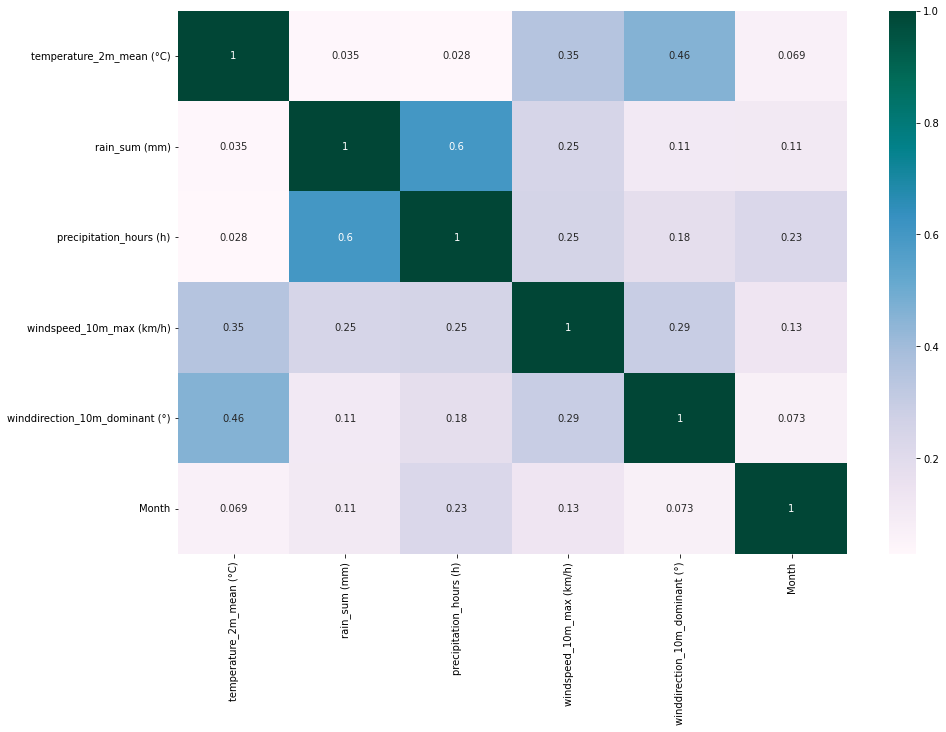

In [28]:
# Checking multicollinearity after removing the correlated fields from our dataframe.

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

**As we can see from the above heatmap that now no more fields are correlated so now our dataset is free of multicollinearity and finally we can procede further.**

# **Train Test Split**

In [29]:
# Importing necessary Libraries.

from sklearn.model_selection import train_test_split

In [30]:
# Data for all the independent variables
X = np.sqrt(df.drop('rain_sum (mm)',axis=1))

# Data for the dependent variable
y = np.sqrt(df['rain_sum (mm)'])

In [31]:
# Dividing the data in training and test dataset.

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [32]:
# cHecking the shape of our train and test data.

print(X_train.shape)
print(X_test.shape)

(1201, 5)
(301, 5)


In [33]:
# Transforming data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Models**

Following models have been used for predictions:-

*   Linear Regression 
*   Random Forest Regressor
*   XGBoost Regressor



# **Linear Regression Model**

In [34]:
#Building the model and fitting training data.
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
#Checking the coefficients.
regressor.coef_
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
temperature_2m_mean (°C),-0.286557
precipitation_hours (h),4.238318
windspeed_10m_max (km/h),0.503067
winddirection_10m_dominant (°),-0.061978
Month,-0.013416


In [36]:
#Checking the intercept.
regressor.intercept_

-0.09952984014040644

In [37]:
#Checking the score.
regressor.score(X_train,y_train)

0.7690030110594958

In [38]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred_test = regressor.predict(X_test)

In [39]:
# Importing important libraries for checking evaluation metrics.

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [40]:
# evaluation metrics for TRAIN data

MSE_lr = mean_squared_error(y_train, y_pred_train)
MAE_lr = mean_absolute_error(y_train, y_pred_train)
RMSE_lr = np.sqrt(MSE_lr)
r2_lr = r2_score(y_train,y_pred_train)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [41]:
# Evaluation of training data set

print(f"The Mean Absolute Error (MAE) is {MAE_lr}.")
print(f"The Mean Squred Error(MSE) is {MSE_lr}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_lr}.")
print(f"The R2 Score is {r2_lr}.")
print(f"Adjusted R2 is {Adjusted_R2_lr}." )

The Mean Absolute Error (MAE) is 0.3498584011439139.
The Mean Squred Error(MSE) is 0.5453954736872852.
The Root Mean Squared Error(RMSE) is 0.7385089530176904.
The R2 Score is 0.7690030110594958.
Adjusted R2 is 0.7650878078571144.


In [42]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }

In [43]:
#Storing the evaluation metrices in dataframe.
training_df=pd.DataFrame(dict1,index=[1])
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,0.35,0.545,0.739,0.769,0.77


In [44]:
#Predicting for Test data.
y_pred_test = regressor.predict(X_test)

In [45]:
# evaluation metrics for TEST data

MSE_lr = mean_squared_error(y_test,y_pred_test)
MAE_lr = mean_absolute_error(y_test,y_pred_test)
RMSE_lr = np.sqrt(MSE_lr)
r2_lr = r2_score(y_test,y_pred_test)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [46]:
# Evaluation of test data set

print(f"The Mean Absolute Error (MAE) is {MAE_lr}.")
print(f"The Mean Squred Error(MSE) is {MSE_lr}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_lr}.")
print(f"The R2 Score is {r2_lr}.")
print(f"Adjusted R2 is {Adjusted_R2_lr}." )

The Mean Absolute Error (MAE) is 0.3568660517619352.
The Mean Squred Error(MSE) is 0.368595508998495.
The Root Mean Squared Error(RMSE) is 0.6071206708707051.
The R2 Score is 0.8380811090044968.
Adjusted R2 is 0.8353367210215222.


In [47]:
# storing the test set metrics value in test evaluation dataframe.
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,0.357,0.369,0.607,0.838,0.84


Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

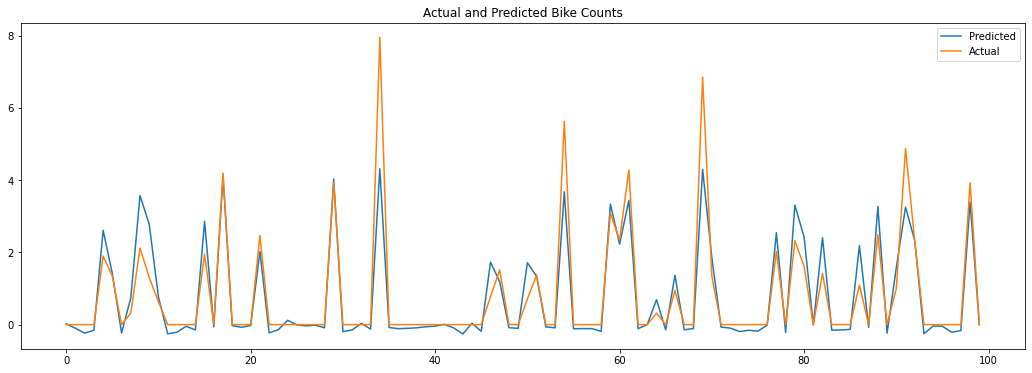

In [48]:
#Plotting the linegraph for actual and predicted bike counts.
plt.figure(figsize=(18,6))
plt.plot((y_pred_test)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

# **Random Forest Regressor**

In [49]:
# Importing important library

from sklearn.ensemble import RandomForestRegressor

In [50]:
#Creating an instance for the random forest regressor.
rf = RandomForestRegressor()


In [51]:
param_grid_cv = {'n_estimators': [200, 500],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth' : [5,6,7,8,9,10,11],}

In [52]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator = rf, param_grid = param_grid_cv, cv = 5)

In [53]:
# Fitting the training data into the model.

CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [54]:
# Best set of parametes

CV_rfc.best_params_

{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}

In [55]:
# predict on train data.
y_pred_train_grid_cvr = CV_rfc.predict(X_train)

# predict on test data.
y_pred_test_grid_cvr = CV_rfc.predict(X_test)

In [56]:
# calculating model score on train data

print("Model Score:",CV_rfc.score(X_train,y_train))

Model Score: 0.9682787059030141


In [57]:
# Evaluation metrics for TRAIN data

MSE_rf = mean_squared_error(y_train, y_pred_train_grid_cvr)
MAE_rf= mean_absolute_error(y_train, y_pred_train_grid_cvr)
RMSE_rf=np.sqrt(MSE_rf)
r2_rf= r2_score(y_train, y_pred_train_grid_cvr)
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_grid_cvr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [58]:
print(f"The Mean Absolute Error (MAE) is {MAE_rf}.")
print(f"The Mean Squred Error(MSE) is {MSE_rf}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_rf}.")
print(f"The R2 Score is {r2_rf}.")
print(f"Adjusted R2 is {Adjusted_R2_rf}." )

The Mean Absolute Error (MAE) is 0.11665790496500399.
The Mean Squred Error(MSE) is 0.07489556595239982.
The Root Mean Squared Error(RMSE) is 0.27367054271952584.
The R2 Score is 0.9682787059030141.
Adjusted R2 is 0.9677410568505228.


In [59]:
# Storing metrics in a dictionary.
dict1={'Model':'Random forest regression',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

# adding the values to the train evaluation dataframe.

training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.350,0.545,0.739,0.769,0.77
1,Random forest regression,0.117,0.075,0.274,0.968,0.97


In [60]:
# Evaluation metrics for TEST data

MSE_rf= mean_squared_error(y_test, y_pred_test_grid_cvr)
MAE_rf= mean_absolute_error(y_test, y_pred_test_grid_cvr)
RMSE_rf=np.sqrt(MSE_rf)
r2_rf= r2_score((y_test), (y_pred_test_grid_cvr))
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_grid_cvr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [61]:
print(f"The Mean Absolute Error (MAE) is {MAE_rf}.")
print(f"The Mean Squred Error(MSE) is {MSE_rf}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_rf}.")
print(f"The R2 Score is {r2_rf}.")
print(f"Adjusted R2 is {Adjusted_R2_rf}." )

The Mean Absolute Error (MAE) is 0.22707379561488306.
The Mean Squred Error(MSE) is 0.260930731828391.
The Root Mean Squared Error(RMSE) is 0.5108137936943276.
The R2 Score is 0.88537675122767.
Adjusted R2 is 0.8834339842993254.


In [62]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Random forest regression',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.357,0.369,0.607,0.838,0.84
1,Random forest regression,0.227,0.261,0.511,0.885,0.88


Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

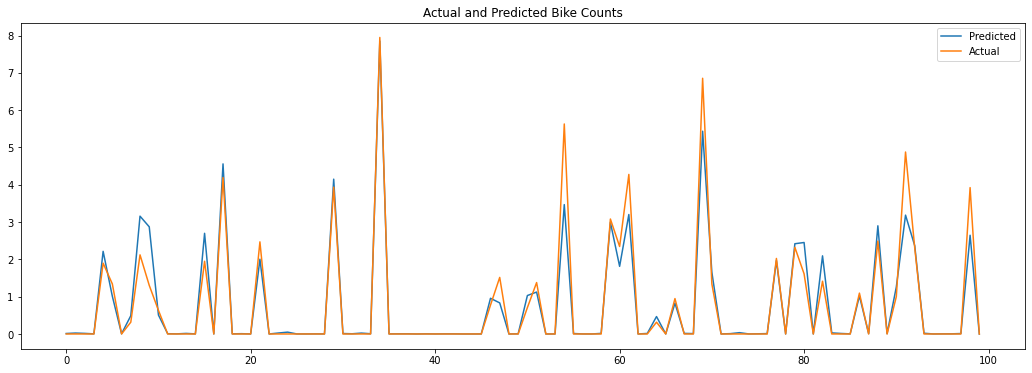

In [63]:
# Plotting the actual vs predicted line graph.

plt.figure(figsize=(18,6))
plt.plot((y_pred_test_grid_cvr)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

# **XGBoost Regressor**

In [64]:
# Importing important libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

In [65]:
# Providing the range of values for hyperparameters such as number of trees
n_estimators = [50, 100, 150]

# Maximum depth of trees
max_depth = [6, 8, 10]

# Minimum number of samples required to split a mode
min_sample_split = [50, 100, 150]

# Minimum number of samples required to split a mode
min_sample_leaf = [40, 50]

# Learning rate
eta = [0.08, 0.05, 0.1]

In [66]:
# Fitting xgb
model = XGBRegressor(silent=True, random_state=3)

In [67]:
# Hyperparameter param
param = {'n_estimators' : n_estimators,
         'max_depth' : max_depth,
         'min_samples_split': min_sample_split,
         'min_samples_leaf': min_sample_leaf,
         'eta' : eta}

In [68]:
# GridSearchCV to find best parameters

model = GridSearchCV(model, param_grid=param, scoring='neg_mean_squared_error',cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(random_state=3, silent=True),
             param_grid={'eta': [0.08, 0.05, 0.1], 'max_depth': [6, 8, 10],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [69]:
# Analysing the best set of parameters

model.best_params_

{'eta': 0.08,
 'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 50}

In [70]:
# predict on train data.
y_pred_train_xgb = model.predict(X_train)

# predict on test data.
y_pred_test_xgb = model.predict(X_test)

In [71]:
# calculating model score on train data.

print("Model Score:", model.score(X_train,y_train))

Model Score: -0.004015508883471149


In [72]:
# Evaluation metrics for TRAIN data

MSE_xgb= mean_squared_error(y_train, y_pred_train_xgb)
MAE_xgb= mean_absolute_error(y_train, y_pred_train_xgb)
RMSE_xgb=np.sqrt(MSE_xgb)
r2_xgb= r2_score(y_train, y_pred_train_xgb)
Adjusted_R2_xgb=(1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )

In [73]:
print(f"The Mean Absolute Error (MAE) is {MAE_xgb}.")
print(f"The Mean Squred Error(MSE) is {MSE_xgb}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_xgb}.")
print(f"The R2 Score is {r2_xgb}.")
print(f"Adjusted R2 is {Adjusted_R2_xgb}." )

The Mean Absolute Error (MAE) is 0.02077999850248099.
The Mean Squred Error(MSE) is 0.004015508883471149.
The Root Mean Squared Error(RMSE) is 0.06336804307749411.
The R2 Score is 0.9982992699684972.
Adjusted R2 is 0.9982704440357598.


In [74]:
# storing the train matrics in the train evaluation dataframe
dict1={'Model':'XGBoost Regression ',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_R2_xgb),2)
      }
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.350,0.545,0.739,0.769,0.77
1,Random forest regression,0.117,0.075,0.274,0.968,0.97
2,XGBoost Regression,0.021,0.004,0.063,0.998,1.00


In [75]:
# Evaluation metrics for TEST data

MSE_xgbt= mean_squared_error(y_test, y_pred_test_xgb)
MAE_xgbt= mean_absolute_error(y_test, y_pred_test_xgb)
RMSE_xgbt=np.sqrt(MSE_xgbt)
r2_xgbt= r2_score((y_test), (y_pred_test_xgb))
Adjusted_R2_xgbt=(1-(1-r2_score((y_test), (y_pred_test_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [76]:
print(f"The Mean Absolute Error (MAE) is {MAE_xgbt}.")
print(f"The Mean Squred Error(MSE) is {MSE_xgbt}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_xgbt}.")
print(f"The R2 Score is {r2_xgbt}.")
print(f"Adjusted R2 is {Adjusted_R2_xgbt}." )

The Mean Absolute Error (MAE) is 0.24961692108039676.
The Mean Squred Error(MSE) is 0.33459395440967893.
The Root Mean Squared Error(RMSE) is 0.5784409688202237.
The R2 Score is 0.8530175199936135.
Adjusted R2 is 0.850526291518929.


In [77]:
# storing the test matrics in the test evaluation dataframe
dict2={'Model':'XGBoost regression ',
       'MAE':round((MAE_xgbt),3),
       'MSE':round((MSE_xgbt),3),
       'RMSE':round((RMSE_xgbt),3),
       'R2_score':round((r2_xgbt),3),
       'Adjusted R2':round((Adjusted_R2_xgbt),2)
      }
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.357,0.369,0.607,0.838,0.84
1,Random forest regression,0.227,0.261,0.511,0.885,0.88
2,XGBoost regression,0.250,0.335,0.578,0.853,0.85


Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

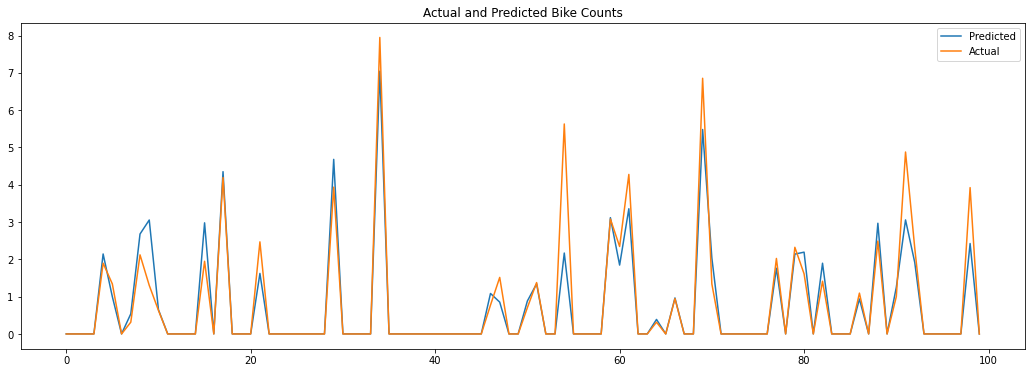

In [78]:
# Plotting the actual vs predicted line graph.

plt.figure(figsize=(18,6))
plt.plot((y_pred_test_xgb)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

# **Conclusions**

* **As we can check that Random forest is giving us the highest Adjusted R2 that is 0.88.**

* **In conclusion, the rainfall prediction can be accuratley done using Random Forest.**